# Question 1

# Write a function calles similar_str(s_1, s_2).
The function will get two strings and return TRUE if these two strings are  two edits away from each other, otherwise FALSE.
Allowed actions: Add, Delete or change a character.


Levinstain distance

In [53]:
def ld(s, t):
    "This function returns the Levenshtein distance between 2 strings"
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
       
    res = min([ld(s[:-1], t)+1,
               ld(s, t[:-1])+1,
               ld(s[:-1], t[:-1]) + cost])

    return res


In [58]:
def similar_str(s, t):
    "This function indicates if 2 strings are 2 edits away"
    return ld(s,t) == 2

Example:

In [62]:
similar_str('python', 'pytheq')

True

# Question 2

Your team communicates with DBs on a daily basis, like Oracle DB (PL-SQL). The problem is that they connect, read and write with their own different scripts. It seems a bit un-organized and inefficient – for a generic task like so.
You are asked to write a class in python script (or “pseudo” like python) in module named connect_db.py that all of your teammates would use, and will allow them to read and write to the Database. 
We care less about syntax and more about your way of thinking, clean code and modularity.

Here are few of the details to make a connection with a database:
Use cx_oracle package, to establish a simple connection. A simple example:
import cx_oracle
connection = cx_oracle.connect(user_name, password, database_address)
cursor = connection.cursor()

These connection parameters below are similar for the whole team. In your answer, please address in few words to the issue of how would store them and later pass to your class or functions in your code.
Oracle user name: user1
Oracle password: p@ssw0rd
Oracle database address: idb_lab


In [60]:
pip install cx_Oracle

     |████████████████████████████████| 852 kB 5.1 MB/s 


In [64]:
# This code will be stored in the connect_db.py file
# This script reads from a json file with this structure: 
# {"user_name": "user1", 
#  "password": "p@ssw0rd", 
#  "address": "idb_lab"}

import cx_Oracle as cx
import json

class Dbcon:
    def __init__(self, conf_file_path = 'dbconf.json'):
        with open(conf_file_path) as f:
            db_conf = json.load(f)
        self.user_name = db_conf["user_name"]
        self.password = db_conf["password"]
        self.address = db_conf["address"]

    def connect(self):
        self.con = cx_Oracle.connect(self.user, self.password, self.address)
        self.cur = self.con.cursor()

    # execute is used for reading/writing to the DB. The input is a SQL statement.
    def execute(self, sql_statement):
        self.cur.execute("SQL statement")
        res = cur.fetchall()

        return res

    def close(self):
        self.cur.close()
        self.con.close()

# Question 3 (open question)

#1 OOP

In [ ]:
#  (תכונות ומתודות)הגדרה של עצמים בעלי יחסים היררכיים ובעלי תכונות ופונקציונליות משלהם
# הם פועלים כיחידה אצמעית

# 2 Functional programming

In [ ]:
# תכנות פונקציונלי : חלוקת הקוד הכללי לתתי משימות (פונקציות) שאינן תלויות אחת בשניה. השמת הדגש ניתן על חישוב הביטוי

# Relational vs none relational

In [ ]:
# אני אשתמש בדאטה בייס רלציוני כאשר ניתן לאחסן את הדאטה בטבלאות בעלי סכמה ידועה מראש וניתן לקשר ביניהם באמצעות מפתחות
# במידה והדאטה לא ניתן לארגון בצורה הזאתי, ניתן להשתמש בדאטה בייסים לא רלציוניים, כדוגמת מונגו, שהוא מסוג דוקומנט דאטה בייס שמאחסן את הדאטה בצורה של מפתחות וערכים, והערכים יכולים להיות כל דבר (כמו תמונות או קטע קול או מסמכי טקסט שאינם בעלי סכמה ברורה)

# Exam

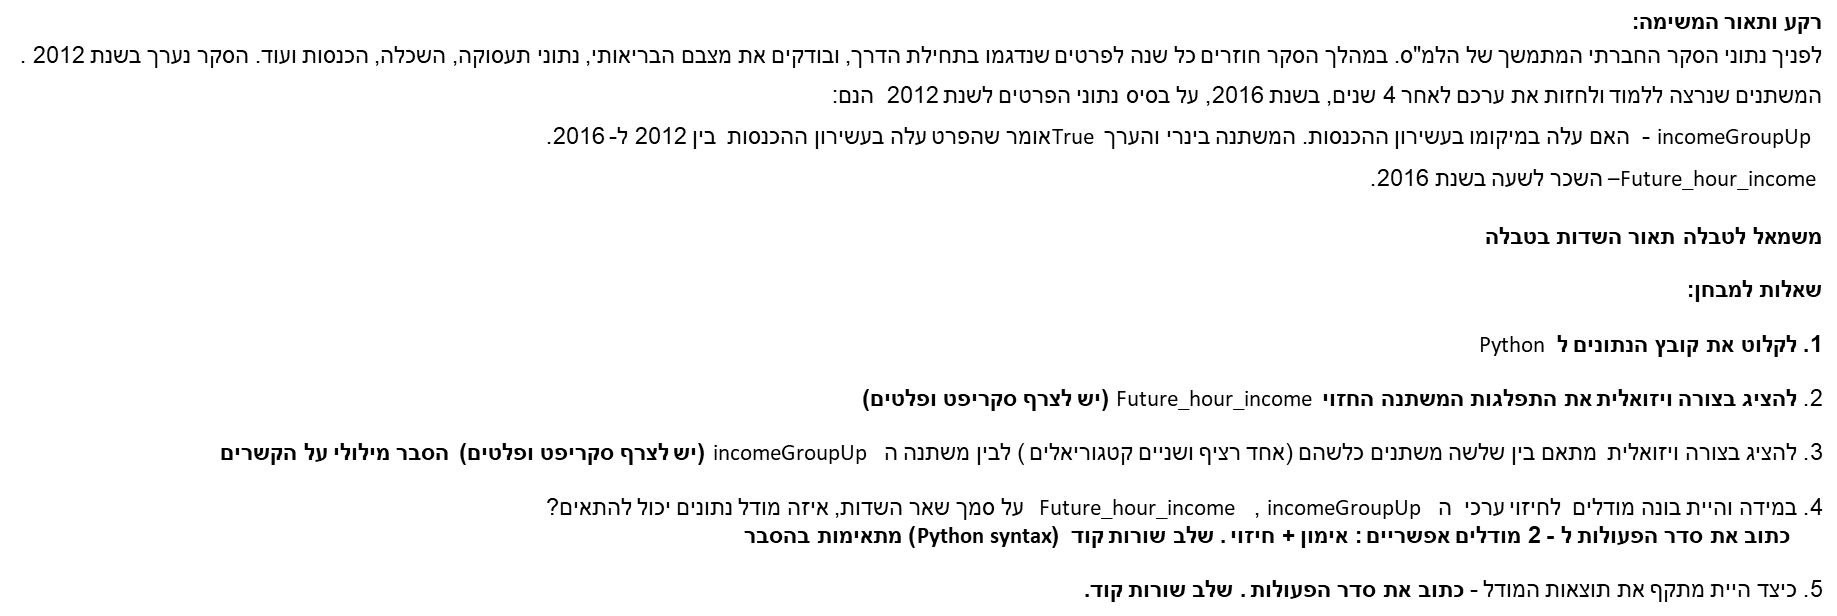

#1

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
data = pd.read_excel('book.xlsx')

In [69]:
data

,id,matzavbriut,k_gova,k_mishkal,k_safaikarit,labour_force_participation,gilGroup,MeanIncomeGroup,hashavani,chipesshana,teudagvoha,k_shnlimklali,k_sug_mosad,m_eretz,mazav,mamadavoda,mekabelsachar,min,semelmishlach,safanosefetanglit,k_semelmiktzlim,incomeGroupUp,future_hour_income
0,5990004,VeryGood,179_175,74_70,Hebrew,False,22-25,7777,Never,NaN,Post_secondaryschooldiploma_non_academictrack_,13_15,NaN,Israel,Nevermarried,NaN,NaN,Male,NaN,yes,NaN,False,0.000000
1,2930001,Good,169_165,74_70,Hebrew,False,76-80,7,YesUsually,no,Nodiplomaordegree,NaN,NaN,Asia,Widowed,NaN,NaN,Male,NaN,no,NaN,False,0.000000
2,10930001,VeryGood,190andmore,89_85,Hebrew,True,41-45,7,Rarely,NaN,Firstacademicdegree_BAorsimilardegree_,16andmore,NaN,Israel,Married,SelfEmployed,NaN,Male,Managers,yes,business,False,0.000000
3,42280001,NotsoGood,NaN,109_105,Russian,True,51-55,5640,Never,NaN,Primaryschoolorintermediateschooldiploma,13_15,NaN,Euorope_America,Divorced,Employed,FromWorkingPlace,Male,Managers,yes,NaN,False,33.125000
4,36560004,VeryGood,NaN,64_60,Hebrew,False,NaN,7,NaN,no,Secondaryschooldiplomaג€“matriculationcertificate,11_12,NaN,Israel,Nevermarried,NaN,NaN,Male,NaN,yes,NaN,True,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,7840001,NotsoGood,169_165,64_60,Arabic,True,61-65,1922,Never,NaN,Nodiplomaordegree,9_10,NaN,Israel,Widowed,Employed,FromWorkingPlace,Female,Serviceandsalesworkers,yes,NaN,False,20.833333
507,11850001,VeryGood,NaN,NaN,Hebrew,True,41-45,4039,Sometimes,NaN,Nodiplomaordegree,11_12,NaN,Israel,Married,Employed,FromWorkingPlace,Male,NaN,no,NaN,False,16.544118
508,14220001,VeryGood,164_160,69_65,Hebrew,True,36-40,5640,YesUsually,NaN,Firstacademicdegree_BAorsimilardegree_,16andmore,AcademidColleges,Israel,Married,Employed,OtherSource,Female,Managers,yes,Engineeringandarchitecture,False,34.345000
509,31160001,NotsoGood,upto149,59_55,French,False,71-75,7,Rarely,no,Secondaryschooldiplomaג€“matriculationcertificate,16andmore,NaN,Africa,Married,NaN,NaN,Female,NaN,yes,NaN,False,0.000000


# 2

In [71]:
data.future_hour_income.describe()

count    511.000000
mean      39.505287
std       56.012393
min        0.000000
25%        0.000000
50%       25.693229
75%       58.750000
max      431.226852
Name: future_hour_income, dtype: float64

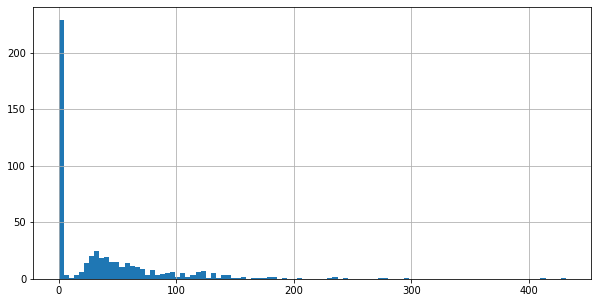

In [75]:
data.future_hour_income.hist(bins=100, figsize=(10,5))

# 3

In [78]:
(data.future_hour_income==0).sum()/len(data.future_hour_income)

0.44227005870841485

In [80]:
data[data.future_hour_income==0]['mamadavoda'].value_counts(dropna=False)

NaN             155
Employed         58
SelfEmployed     13
Name: mamadavoda, dtype: int64

In [81]:
data[data.future_hour_income==0]['hashavani'].value_counts(dropna=False)

Never         114
YesUsually     35
Sometimes      34
Rarely         32
NaN            11
Name: hashavani, dtype: int64

In [ ]:
# Insights:
# 1) 44% of the population has 0 future income. I have assumed that these may be unemployed in 2016. 
# To varify that, I checked correlation to the mamadavoda column and it appears to contain not only NaN values (so i can't assume that they are unemployed. This needs further investigation)
# I have also assumed that there may be high correlation to the hashavani column, but the most frequent value was "Never". 
# Conclusion: it's not very clear what are these NaNs and it needs further investigation.
# 2) The hourly pay in 2016 was between 0 and 431 shekels/hour, and the median pay was 25.6.

In [82]:
data.gilGroup.nunique()

13

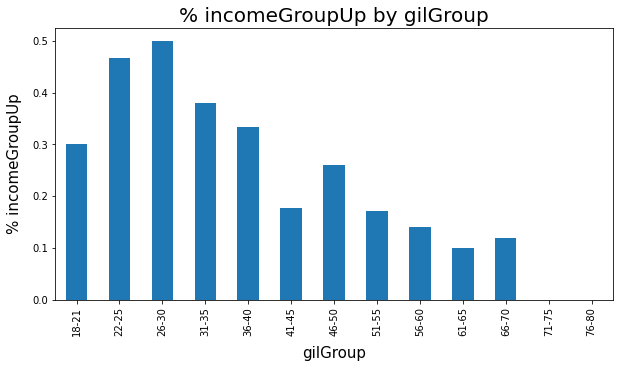

In [93]:
data.groupby('gilGroup')['incomeGroupUp'].mean().plot.bar(figsize=(10,5))
plt.title('% incomeGroupUp by gilGroup', size=20)
plt.xlabel('gilGroup', size=15, labelpad=10)
plt.ylabel('% incomeGroupUp', size=15, labelpad=10)
plt.show()

In [ ]:
# Insights:
# There is a negative correlation between gilGroup and incomeGroupUp. (The higher the age, the lower the probability for incomeGroupUp)
# 22-30 are the age groups with the highest percentage of incomeGroupUp (45%-50%)

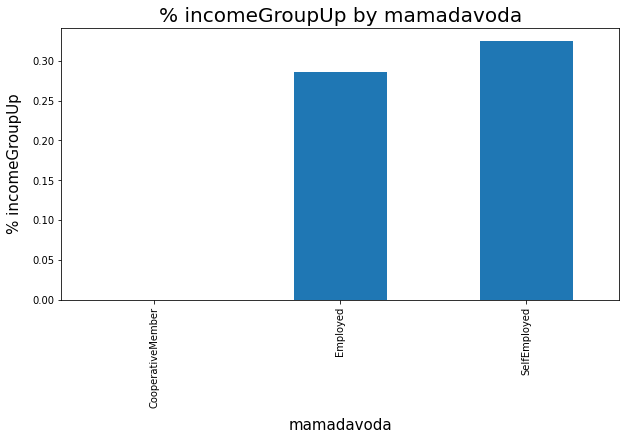

In [95]:
data.groupby('mamadavoda')['incomeGroupUp'].mean().plot.bar(figsize=(10,5))
plt.title('% incomeGroupUp by mamadavoda', size=20)
plt.xlabel('mamadavoda', size=15, labelpad=10)
plt.ylabel('% incomeGroupUp', size=15, labelpad=10)
plt.show()

In [ ]:
# Insights:
# The self employed group has the slighly higher income group up percentage, although the values are relatively similar (it's not a great indicator for predicting IncomeGroupUp)

In [98]:
# Trying to find continuous varibales...
data.nunique()

id                            511
matzavbriut                     4
k_gova                          8
k_mishkal                      15
k_safaikarit                    7
labour_force_participation      2
gilGroup                       13
MeanIncomeGroup                 7
hashavani                       4
chipesshana                     2
teudagvoha                      7
k_shnlimklali                   6
k_sug_mosad                     4
m_eretz                         4
mazav                           4
mamadavoda                      3
mekabelsachar                   3
min                             2
semelmishlach                   7
safanosefetanglit               2
k_semelmiktzlim                13
incomeGroupUp                   2
future_hour_income            216
dtype: int64

In [ ]:
# Since there aren't any continuous variables in the data, I took the future_hour_income for this analysis.

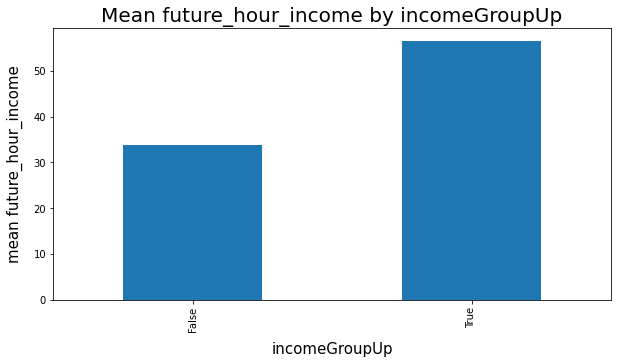

In [102]:
data.groupby('incomeGroupUp')['future_hour_income'].mean().plot.bar(figsize=(10,5))
plt.title('Mean future_hour_income by incomeGroupUp', size=20)
plt.xlabel('incomeGroupUp', size=15, labelpad=10)
plt.ylabel('mean future_hour_income', size=15, labelpad=10)
plt.show()

In [ ]:
# Insights:
# The people with higher levels of income are more likely to be included in the income group up.
# The average income per hour for the none income group up is around 30+, while for the income group up it's around 55.

# Question 4:

Data preprocessing

In [ ]:
# for lack of time, the EDA was very brief and the preprocessing was minimal.

In [165]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          511 non-null    int64  
 1   matzavbriut                 510 non-null    object 
 2   k_gova                      420 non-null    object 
 3   k_mishkal                   372 non-null    object 
 4   k_safaikarit                511 non-null    object 
 5   labour_force_participation  511 non-null    bool   
 6   gilGroup                    507 non-null    object 
 7   MeanIncomeGroup             511 non-null    int64  
 8   hashavani                   490 non-null    object 
 9   chipesshana                 150 non-null    object 
 10  teudagvoha                  495 non-null    object 
 11  k_shnlimklali               496 non-null    object 
 12  k_sug_mosad                 155 non-null    object 
 13  m_eretz                     506 non

# 4.1

In [106]:
data.chipesshana.value_counts(dropna=False)

NaN    361
no     142
yes      8
Name: chipesshana, dtype: int64

In [107]:
data.k_semelmiktzlim.value_counts(dropna=False)

NaN                                      328
Socialsciences                            33
Engineeringandarchitecture                32
business                                  28
other                                     20
Teachertrainingandeducationscience        16
law                                       13
Generalprogrammes                         11
Arts                                       9
Litrature_languagesandregionalstudies      8
Science_mathematicsandcomputing            8
PhysicalSciences                           2
Agriculture                                2
BioligicalSciences                         1
Name: k_semelmiktzlim, dtype: int64

In [108]:
data.labour_force_participation  .value_counts(dropna=False)

True     303
False    208
Name: labour_force_participation, dtype: int64

In [151]:
# Removing the irrelevant columns (id), target columns (incomegroupup and futurehour) and unreliable columns (chipesshana, k_semelmiktzlim)
# The unreliable columns have high percentage of null values and I can't assume they belong to the same group (business wise)
X = data.drop(['id','chipesshana', 'k_semelmiktzlim', 'incomeGroupUp', 'future_hour_income'], axis=1)
y = data.future_hour_income

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [168]:
# saving the most frequent value for each column (will be used for imputing nulls in train and test sets)
most_freq = X_train.mode().T.squeeze(axis=1)

In [169]:
for col in X_train.columns:
    X_train[col] = X_train[col].fillna(most_freq.loc[col])

In [170]:
# we have only categorical columns so we apply one hot encoding (the are no columns with high cardinality)
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [171]:
X_train = pd.DataFrame(ohe.fit_transform(X_train), index=X_train.index, columns=ohe.get_feature_names(X_train.columns))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [198]:
rf_reg = RandomForestRegressor(max_depth=10, random_state=0).fit(X_train, np.log1p(y_train))

In [199]:
y_train_pred = np.expm1(rf_reg.predict(X_train))

In [200]:
RMSE = mean_squared_error(y_train, y_train_pred)
RMSE

1315.8208813697875

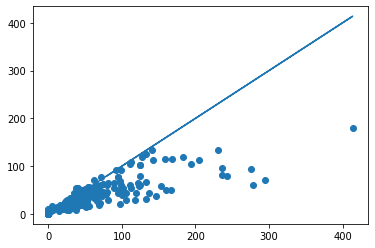

In [201]:
plt.plot(y_train, y_train)
plt.scatter(y_train, y_train_pred)

In [176]:
y_train_clf = data.incomeGroupUp.loc[X_train.index]
y_test_clf = data.incomeGroupUp.loc[X_test.index]

In [195]:
rf_clf = RandomForestClassifier(max_depth = 10, random_state=0).fit(X_train, y_train_clf)

In [196]:
y_train_clf_pred = rf_clf.predict(X_train)

In [210]:
confusion_matrix(y_train_clf, y_train_clf_pred)

array([[272,   0],
       [ 15,  70]])

In [211]:
print(classification_report(y_train_clf, y_train_clf_pred))

              precision    recall  f1-score   support

       False       0.95      1.00      0.97       272
        True       1.00      0.82      0.90        85

    accuracy                           0.96       357
   macro avg       0.97      0.91      0.94       357
weighted avg       0.96      0.96      0.96       357



Looks like the models are overfitted and there is more work to do regarding the preprocessing and model tuning.

# Question 5: model validation

In [ ]:
# I have divided the data to train and test (30%), the model learned only from the train set and i want to see similar results for the chosen metric on both sets
# for lack of time, i didn't use cross validation method.

In [ ]:
for col in X_test.columns:
    X_test[col] = X_test[col].fillna(most_freq.loc[col])

In [ ]:
X_test = pd.DataFrame(ohe.transform(X_test), index=X_test.index, columns=ohe.get_feature_names(X_test.columns))

In [204]:
y_test_pred = np.expm1(rf_reg.predict(X_test))

In [205]:
RMSE = mean_squared_error(y_test, y_test_pred)
RMSE

2559.774485668979

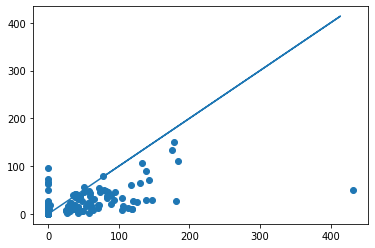

In [206]:
#
plt.plot(y_train, y_train)
plt.scatter(y_test, y_test_pred)

# CLF

In [208]:
y_test_clf_pred = rf_clf.predict(X_test)

In [212]:
confusion_matrix(y_test_clf, y_test_clf_pred)

array([[107,   4],
       [ 38,   5]])

In [213]:
print(classification_report(y_test_clf, y_test_clf_pred))

              precision    recall  f1-score   support

       False       0.74      0.96      0.84       111
        True       0.56      0.12      0.19        43

    accuracy                           0.73       154
   macro avg       0.65      0.54      0.51       154
weighted avg       0.69      0.73      0.66       154



In [ ]:
# as i suspected, the models are not valid and more work needs to be done.